ETS-ANN hybrid model for XRP

In [74]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from pycaret.utils import version
version()
from pycaret.time_series import TSForecastingExperiment
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima.arima.utils import nsdiffs, ndiffs
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.seasonal import STL
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pycaret.time_series import *



Data pre-processing

In [75]:
df_XRP = yf.download(
tickers = ["XRP-USD"],
start = "2020-01-01",
end = "2025-01-02"
)
df_XRP.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df_XRP.shape
df_XRP.info()
print('Null Values:',df_XRP.isnull().values.sum())
print(df_XRP.columns)
df_XRP.reset_index(inplace=True)
df_XRP['Date'] = pd.to_datetime(df_XRP['Date'], format='%Y-%m-%d')
df_XRP = df_XRP[['Date', 'Close']]
df_XRP.head()
df_XRP.set_index('Date', inplace=True)
print(df_XRP.index)
df_XRP = df_XRP.asfreq('D')  
print(f"Frequency of the index: {df_XRP.index.freq}")


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2020-01-01 to 2025-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1828 non-null   float64
 1   High    1828 non-null   float64
 2   Low     1828 non-null   float64
 3   Open    1828 non-null   float64
 4   Volume  1828 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.7 KB
Null Values: 0
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', name='Date', length=1828, freq=None)
Frequency of the ind

In [76]:
exp_XRP = TSForecastingExperiment()
exp_XRP.setup(data=df_XRP, target='Close', fh=365, session_id=123,coverage=0.90)
exp_XRP.check_stats()

,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1828, 1)"
5,Transformed data shape,"(1828, 1)"
6,Transformed train set shape,"(1463, 1)"
7,Transformed test set shape,"(365, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,1828.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,0.578873
3,Summary,Statistics,Transformed,Median,,0.51285
4,Summary,Statistics,Transformed,Standard Deviation,,0.367232
5,Summary,Statistics,Transformed,Variance,,0.134859
6,Summary,Statistics,Transformed,Kurtosis,,8.339111
7,Summary,Statistics,Transformed,Skewness,,2.434459
8,Summary,Statistics,Transformed,# Distinct Values,,1825.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",29992.280377


Getting the complete data used in the experiment

In [77]:
complete_data = exp_XRP.get_config('y') 
fh = exp_XRP.get_config('fh')  
train_data_XRP = complete_data[:-fh[0]] 
test_data_XRP = complete_data[-fh[0]:] 

y_train_XRP = exp_XRP.get_config('y_train')
y_test_XRP = exp_XRP.get_config('y_test')

print("Training Data:")
print(y_train_XRP)
print("\nTesting Data:")
print(y_test_XRP)

Training Data:
Date
2020-01-01    0.192667
2020-01-02    0.188043
2020-01-03    0.193521
2020-01-04    0.194355
2020-01-05    0.195537
                ...   
2023-12-29    0.623402
2023-12-30    0.621844
2023-12-31    0.614941
2024-01-01    0.630082
2024-01-02    0.625363
Freq: D, Name: Close, Length: 1463, dtype: float64

Testing Data:
Date
2024-01-03    0.582580
2024-01-04    0.588226
2024-01-05    0.576486
2024-01-06    0.568512
2024-01-07    0.551741
                ...   
2024-12-28    2.180824
2024-12-29    2.093180
2024-12-30    2.057571
2024-12-31    2.080128
2025-01-01    2.322341
Freq: D, Name: Close, Length: 365, dtype: float64


In [78]:
exp_XRP.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


ETS model selection for XRP

In [82]:
ses_XRP = exp_XRP.create_model('exp_smooth', trend=None, seasonal=None, sp= None, cross_validation=False )
ht_XRP = exp_XRP.create_model('exp_smooth', trend='add', seasonal=None, cross_validation=False)
hw_add_XRP = exp_XRP.create_model('exp_smooth', trend='add', seasonal='add', sp= 365, cross_validation=False)
hw_mult_XRP = exp_XRP.create_model('exp_smooth', trend='add', seasonal='mul', sp=365, cross_validation=False)
hw_damped_XRP = exp_XRP.create_model('exp_smooth', damped_trend='True' , trend='add', seasonal='mul', sp=365, cross_validation=False)
ets_ANN_XRP = exp_XRP.create_model('ets', error="add", trend=None, seasonal=None ,cross_validation=False )
ets_AAN_XRP = exp_XRP.create_model('ets', error="add", trend="add", seasonal=None ,cross_validation=False ) 
ets_AAM_XRP = exp_XRP.create_model('ets', error="add", trend="add", seasonal="mul" ,cross_validation=False )

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,3.8434,4.4471,0.2496,0.5397,0.2174,0.2507,-0.0495


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,4.2273,4.2366,0.2746,0.5142,0.2813,0.2933,0.0475


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,5.1363,4.2571,0.3336,0.5167,0.4037,0.3722,0.0383


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,6.8830,4.6067,0.4471,0.5591,0.6580,0.4856,-0.1261


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,4.8037,4.5101,0.3120,0.5474,0.3450,0.3292,-0.0794


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,3.8434,4.4471,0.2496,0.5397,0.2174,0.2507,-0.0495


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,4.2289,4.2359,0.2747,0.5141,0.2815,0.2935,0.0478


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,4.2463,4.2404,0.2758,0.5147,0.2834,0.2952,0.0458


In [83]:
exp_XRP.compare_models(include=[ ses_XRP, ht_XRP, hw_add_XRP, hw_mult_XRP, hw_damped_XRP, ets_ANN_XRP, ets_AAN_XRP, ets_AAM_XRP, 'ets'], cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
0,Exponential Smoothing,3.8434,4.4471,0.2496,0.5397,0.2174,0.2507,-0.0495,0.0200
5,ETS,3.8434,4.4471,0.2496,0.5397,0.2174,0.2507,-0.0495,0.0100
1,Exponential Smoothing,4.2273,4.2366,0.2746,0.5142,0.2813,0.2933,0.0475,0.0300
6,ETS,4.2289,4.2359,0.2747,0.5141,0.2815,0.2935,0.0478,0.0200
7,ETS,4.2463,4.2404,0.2758,0.5147,0.2834,0.2952,0.0458,0.1300
8,ETS,4.2463,4.2404,0.2758,0.5147,0.2834,0.2952,0.0458,0.2200
4,Exponential Smoothing,4.8037,4.5101,0.3120,0.5474,0.3450,0.3292,-0.0794,5.6200
2,Exponential Smoothing,5.1363,4.2571,0.3336,0.5167,0.4037,0.3722,0.0383,4.0700
3,Exponential Smoothing,6.8830,4.6067,0.4471,0.5591,0.6580,0.4856,-0.1261,6.1900


ExponentialSmoothing()

In [84]:
ets_auto_XRP = exp_XRP.create_model('ets', cross_validation=False)  # Auto ETS selection
tuned_ets_auto_XRP = exp_XRP.tune_model(ets_auto_XRP)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,4.2463,4.2404,0.2758,0.5147,0.2834,0.2952,0.0458


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2021-01-02'], dtype='period[D]', name='Date')",18.0506,10.1336,0.6489,0.7350,0.6847,1.0858,-3.5324
1,"PeriodIndex(['2022-01-02'], dtype='period[D]', name='Date')",3.9735,2.4676,0.3485,0.3917,0.8775,0.5496,-3.7780
2,"PeriodIndex(['2023-01-02'], dtype='period[D]', name='Date')",2.2562,1.4393,0.1669,0.1949,0.2988,0.3659,-2.7392
Mean,nan,8.0934,4.6802,0.3881,0.4405,0.6203,0.6671,-3.3499
SD,nan,7.0756,3.8789,0.1987,0.2232,0.2406,0.3054,0.4433


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.5s finished


In [85]:
exp_XRP.compare_models(include=[ses_XRP, tuned_ets_auto_XRP], cross_validation=False) # Compare tuned Auto-ETS 

ExponentialSmoothing()

the best ETS model for XRP is ses_XRP

In [86]:
# Debugging: Check the type and attributes of ses_XRP
print(f"Type of ses_XRP: {type(ses_XRP)}")
print(f"Attributes and methods of ses_XRP: {dir(ses_XRP)}")

Type of ses_XRP: <class 'sktime.forecasting.exp_smoothing.ExponentialSmoothing'>
Attributes and methods of ses_XRP: ['_X', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rpow__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_alias_params', '_check_X', '_check_X_y', '_check_fh', '_clone_flags', '_components', '_config', '_config_doc', '_config_dynamic', '_converter_store_y', '_cutoff', '_extract_conf_int', '_fh', '_fit', '_fit_forecaster', '_fitted_forecaster', '_fitted_param_names', '_forecaster', '_get_class_flag', '_get_class_flags', '_get_columns', '_get_fitted_param_names', '_get_fitted_params', '_get_fitted_params_default', '_get_flag', '_get_flags', '_get_init_sign

In [87]:
# Get in-sample predictions (TRYING _fitted_forecaster.fittedvalues for sktime)
in_sample_predictions_ses_XRP = ses_XRP._fitted_forecaster.fittedvalues

# Ensure the index of in-sample predictions matches the training data index
in_sample_predictions_ses_XRP.index = exp_XRP.get_config('y_train').index

# Print in-sample predictions
print("\nIn-sample predictions from ses_XRP (ses_XRP):")
print(in_sample_predictions_ses_XRP)


In-sample predictions from ses_XRP (ses_XRP):
Date
2020-01-01    0.192367
2020-01-02    0.192646
2020-01-03    0.188372
2020-01-04    0.193153
2020-01-05    0.194269
                ...   
2023-12-29    0.634932
2023-12-30    0.624226
2023-12-31    0.622014
2024-01-01    0.615447
2024-01-02    0.629036
Freq: D, Length: 1463, dtype: float64


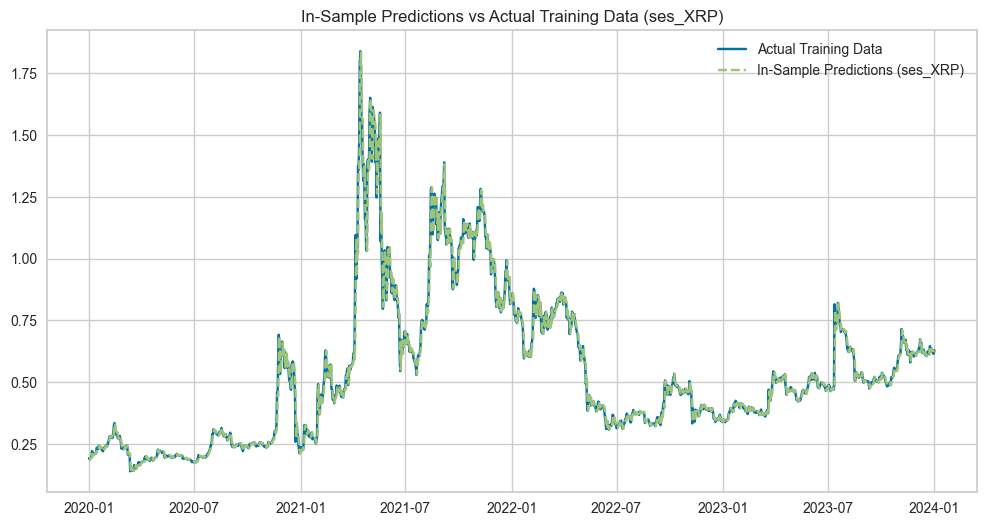

In [88]:
# Plotting in-sample predictions vs actual training data
plt.figure(figsize=(12, 6))
actual_train_index_dt = exp_XRP.get_config('y_train').index.to_timestamp()
prediction_index_dt = in_sample_predictions_ses_XRP.index.to_timestamp()
plt.plot(actual_train_index_dt, exp_XRP.get_config('y_train'), label='Actual Training Data')
plt.plot(prediction_index_dt, in_sample_predictions_ses_XRP, label='In-Sample Predictions (ses_XRP)', linestyle='--')
plt.title('In-Sample Predictions vs Actual Training Data (ses_XRP)')
plt.legend()
plt.show()

In [89]:
# Calculate residuals: actual - predictions
residuals = train_data_XRP - in_sample_predictions_ses_XRP

print("\nFirst 10 residuals:")
print(residuals.head(10))



First 10 residuals:
Date
2020-01-01    0.000300
2020-01-02   -0.004603
2020-01-03    0.005149
2020-01-04    0.001202
2020-01-05    0.001268
2020-01-06    0.026064
2020-01-07   -0.005730
2020-01-08   -0.005301
2020-01-09   -0.004506
2020-01-10    0.007085
Freq: D, dtype: float64


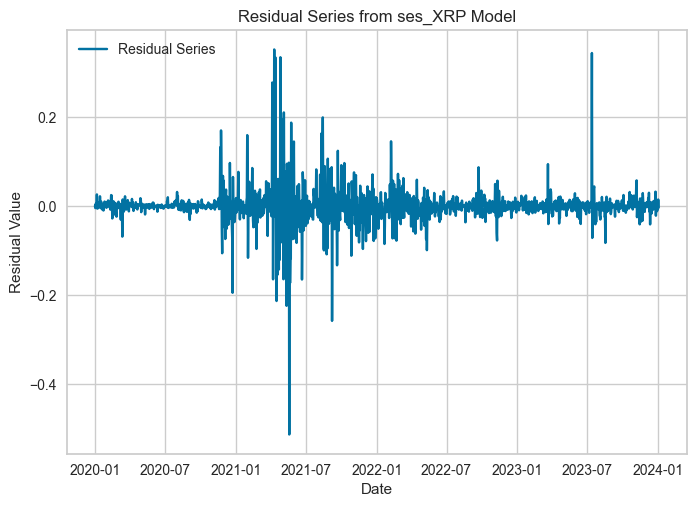

In [90]:
# Convert PeriodIndex to DatetimeIndex for plotting - RESIDUALS INDEX
residuals_index_dt = residuals.index.to_timestamp()

plt.plot(residuals_index_dt, residuals, label='Residual Series')
plt.title('Residual Series from ses_XRP Model')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

In [91]:
# Step 8: Perform Lag Selection using ACF on Residual Series
exp_XRP.plot_model(plot='acf',  data_kwargs={'nlags': 50}) # Analyze ACF plot to choose lags


In [92]:
# Step 9: Normalize Residual Series (Min-Max Normalization)
scaler_residuals = MinMaxScaler(feature_range=(-1, 1))
normalized_residuals = scaler_residuals.fit_transform(residuals.values.reshape(-1, 1))
normalized_residuals = pd.Series(normalized_residuals.flatten(), index=residuals.index)
print("\nFirst 10 Normalized Residuals:")
print(normalized_residuals.head(10))


First 10 Normalized Residuals:
Date
2020-01-01    0.187349
2020-01-02    0.176019
2020-01-03    0.198556
2020-01-04    0.189434
2020-01-05    0.189586
2020-01-06    0.246892
2020-01-07    0.173414
2020-01-08    0.174406
2020-01-09    0.176243
2020-01-10    0.203030
Freq: D, dtype: float64


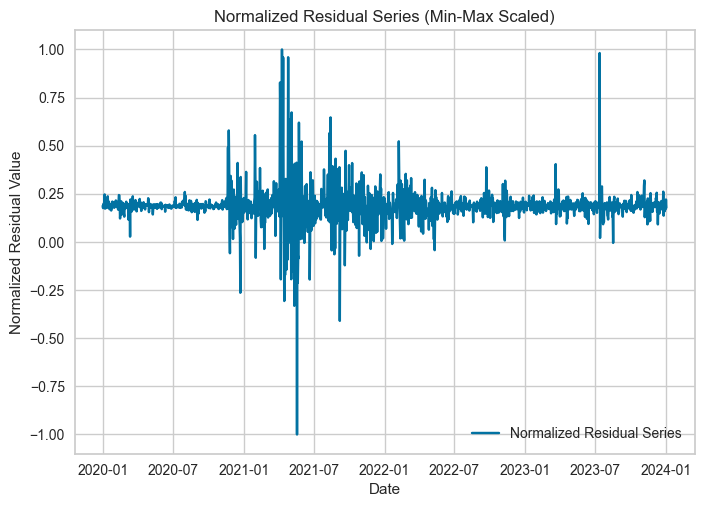

In [93]:
# --- Convert PeriodIndex to DatetimeIndex for plotting - NORMALIZED RESIDUALS INDEX ---
normalized_residuals_index_dt = normalized_residuals.index.to_timestamp()

plt.plot(normalized_residuals_index_dt, normalized_residuals, label='Normalized Residual Series')
plt.title('Normalized Residual Series (Min-Max Scaled)')
plt.xlabel('Date')
plt.ylabel('Normalized Residual Value')
plt.legend()
plt.show()


In [94]:
# Filling any remaining NaNs with 0
normalized_residuals.fillna(0, inplace=True) 


In [95]:
# Step 10a: Prepare Data for ANN - Create Lagged Features and Target

def create_lagged_features(series, lags):
    lagged_features = {}
    for lag in lags:
        lagged_features[f'lag_{lag}'] = series.shift(lag)
    lagged_df = pd.DataFrame(lagged_features)
    return lagged_df 

lags_to_use = [1, 7, 30]  

lagged_residual_features = create_lagged_features(normalized_residuals, lags_to_use)
lagged_residual_features.dropna(inplace=True) 

residual_target = normalized_residuals.reindex(lagged_residual_features.index)

X_train_ann = lagged_residual_features
y_train_ann = residual_target

X_train_ann_np = X_train_ann.values
y_train_ann_np = y_train_ann.values

In [97]:
# Data Splitting for Validation
from sklearn.model_selection import train_test_split
X_train_ann_train, X_val_ann, y_train_ann_train, y_val_ann = train_test_split(
    X_train_ann, y_train_ann, test_size=0.2, shuffle=False
)
X_val_ann_np = X_val_ann.values  
y_val_ann_np = y_val_ann.values  
X_train_ann_train_np = X_train_ann_train.values  
y_train_ann_train_np = y_train_ann_train.values  

# Ensuring Data Types are float32 
X_train_ann_train_np = X_train_ann_train_np.astype(np.float32)  
X_val_ann_np = X_val_ann_np.astype(np.float32)  
y_train_ann_train_np = y_train_ann_train_np.astype(np.float32) 
y_val_ann_np = y_val_ann_np.astype(np.float32)

In [98]:
# --- Manual Tuning Loop Code Block ---

neuron_options = [25, 50, 100]
epochs_options = [30, 50, 70]
batch_size_options = [16, 32, 64]

best_rmse = float('inf') 
best_params = None

for neurons in neuron_options:
    for epochs in epochs_options:
        for batch_size in batch_size_options:
            print(f"Trying: Neurons={neurons}, Epochs={epochs}, Batch Size={batch_size}")
            
            # Building ANN model 
            ann_model = Sequential()
            ann_model.add(Dense(neurons, activation='relu', input_shape=(X_train_ann_train_np.shape[1],))) 
            ann_model.add(Dense(25, activation='relu'))
            ann_model.add(Dense(1))
            ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse') 
            
            # Training model 
            ann_model.fit(X_train_ann_train_np, y_train_ann_train_np, epochs=epochs, batch_size=batch_size, verbose=0)
            
            print(f"NaNs in X_val_ann_np BEFORE prediction: {np.isnan(X_val_ann_np).any()}") 

            # Evaluating on VALIDATION set 
            validation_predictions = ann_model.predict(X_val_ann_np).flatten() 
            rmse = np.sqrt(mean_squared_error(y_val_ann_np, validation_predictions)) 

            print(f"  Validation RMSE: {rmse:.4f}")

            if rmse < best_rmse: 
                best_rmse = rmse
                best_params = {'neurons': neurons, 'epochs': epochs, 'batch_size': batch_size}

print("\nBest Hyperparameters found (based on Validation RMSE):")
print(best_params)
print(f"Best Validation RMSE: {best_rmse:.4f}")

Trying: Neurons=25, Epochs=30, Batch Size=16


NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 385us/step


  Validation RMSE: 0.1386
Trying: Neurons=25, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 336us/step


  Validation RMSE: 0.1540
Trying: Neurons=25, Epochs=30, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 349us/step


  Validation RMSE: 0.1944
Trying: Neurons=25, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 336us/step


  Validation RMSE: 0.1761
Trying: Neurons=25, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 453us/step


  Validation RMSE: 0.1573
Trying: Neurons=25, Epochs=50, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 436us/step


  Validation RMSE: 0.1787
Trying: Neurons=25, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 379us/step


  Validation RMSE: 0.1687
Trying: Neurons=25, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 375us/step


  Validation RMSE: 0.2390
Trying: Neurons=25, Epochs=70, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 349us/step


  Validation RMSE: 0.1501
Trying: Neurons=50, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 500us/step


  Validation RMSE: 0.1518
Trying: Neurons=50, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 378us/step


  Validation RMSE: 0.1508
Trying: Neurons=50, Epochs=30, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 398us/step


  Validation RMSE: 0.1455
Trying: Neurons=50, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 2ms/step


  Validation RMSE: 0.1968
Trying: Neurons=50, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 401us/step


  Validation RMSE: 0.1684
Trying: Neurons=50, Epochs=50, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 383us/step


  Validation RMSE: 0.1726
Trying: Neurons=50, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 343us/step


  Validation RMSE: 0.1542
Trying: Neurons=50, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 347us/step


  Validation RMSE: 0.1939
Trying: Neurons=50, Epochs=70, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 383us/step


  Validation RMSE: 0.2174
Trying: Neurons=100, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 376us/step


  Validation RMSE: 0.1698
Trying: Neurons=100, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 416us/step


  Validation RMSE: 0.2257
Trying: Neurons=100, Epochs=30, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 344us/step


  Validation RMSE: 0.1510
Trying: Neurons=100, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 413us/step


  Validation RMSE: 0.2087
Trying: Neurons=100, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 517us/step


  Validation RMSE: 0.2334
Trying: Neurons=100, Epochs=50, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 514us/step


  Validation RMSE: 0.1850
Trying: Neurons=100, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 1ms/step


  Validation RMSE: 0.2439
Trying: Neurons=100, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 401us/step


  Validation RMSE: 0.1980
Trying: Neurons=100, Epochs=70, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 443us/step
  Validation RMSE: 0.1948

Best Hyperparameters found (based on Validation RMSE):
{'neurons': 25, 'epochs': 30, 'batch_size': 16}
Best Validation RMSE: 0.1386


In [99]:
# Best Hyperparameters from Tuning (replace with your best values if different)
best_neurons = 25
best_epochs = 30
best_batch_size = 16

# 1. Build the Final ANN Model with Best Hyperparameters
final_ann_model = Sequential()
final_ann_model.add(Dense(best_neurons, activation='relu', input_shape=(X_train_ann_np.shape[1],))) # Best neurons for layer 1
final_ann_model.add(Dense(25, activation='relu')) # You can keep layer 2 as before
final_ann_model.add(Dense(1))

# 2. Compile the Final ANN Model
optimizer = Adam(learning_rate=0.001) # You can keep learning rate as before, or tune it too
final_ann_model.compile(optimizer=optimizer, loss='mse')

# 3. Train the Final ANN Model (on FULL training data: X_train_ann_np, y_train_ann_np)
final_ann_model.fit(X_train_ann_np, y_train_ann_np, epochs=best_epochs, batch_size=best_batch_size, verbose=0) # Use best epochs, batch_size

# 4. Print Model Summary of the Final Model
final_ann_model.summary()

print("\nFinal ANN Model Retraining Complete (with Best Hyperparameters)!")

Model: "sequential_279"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_837 (Dense)           (None, 25)                100       
                                                                 
 dense_838 (Dense)           (None, 25)                650       
                                                                 
 dense_839 (Dense)           (None, 1)                 26        
                                                                 
Total params: 776
Trainable params: 776
Non-trainable params: 0
_________________________________________________________________

Final ANN Model Retraining Complete (with Best Hyperparameters)!



First 10 De-normalized In-Sample ANN Residual Predictions:
Date
2020-01-31    0.004252
2020-02-01    0.002254
2020-02-02    0.003203
2020-02-03    0.004516
2020-02-04    0.003652
2020-02-05    0.005125
2020-02-06    0.004825
2020-02-07    0.003856
2020-02-08    0.002457
2020-02-09    0.002498
Freq: D, dtype: float32


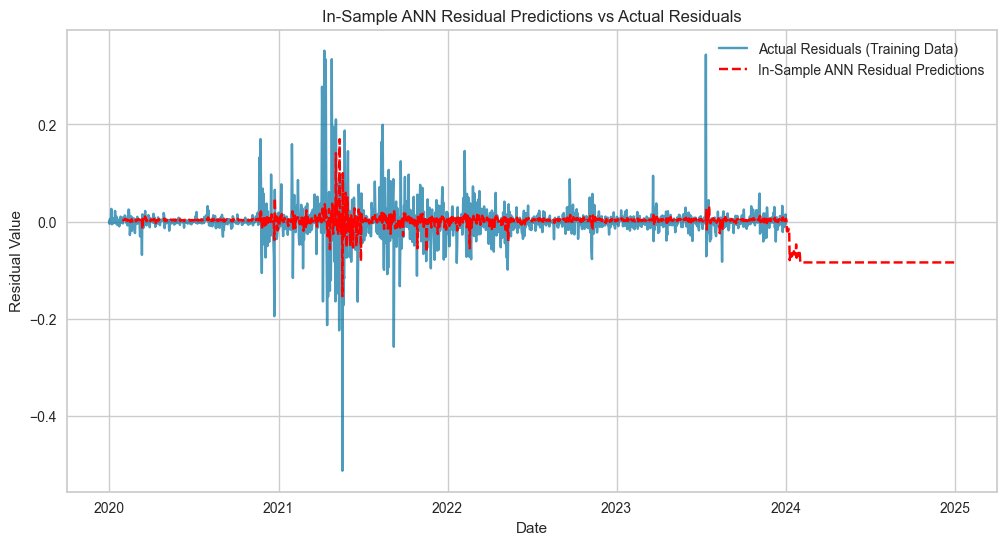

In [100]:
# Step 10 (Continued): Obtain In-Sample ANN Residual Predictions

# Use the trained final_ann_model to predict in-sample residuals

# 1. Prepare Input Features (already have X_train_ann_np from Step 10a)
#    X_train_ann_np (numpy array of lagged features for training data) is ready to use.

# 2. Generate In-Sample ANN Residual Predictions (Normalized)
ann_predictions_insample_normalized = final_ann_model.predict(X_train_ann_np, verbose=0).flatten()
ann_predictions_insample_normalized = pd.Series(ann_predictions_insample_normalized, index=X_train_ann.index)

# 3. De-normalize ANN Predictions (back to original residual scale)
ann_predictions_insample_denormalized = scaler_residuals.inverse_transform(ann_predictions_insample_normalized.values.reshape(-1, 1)).flatten()
ann_predictions_insample_denormalized = pd.Series(ann_predictions_insample_denormalized, index=ann_predictions_insample_normalized.index)

# 4. Print a sample of de-normalized in-sample ANN predictions
print("\nFirst 10 De-normalized In-Sample ANN Residual Predictions:")
print(ann_predictions_insample_denormalized.head(10))

# 5. Plotting In-Sample ANN Residual Predictions vs Actual Residuals (Optional)
plt.figure(figsize=(12, 6))
plt.plot(residuals.index.to_timestamp(), residuals, label='Actual Residuals (Training Data)', alpha=0.7) # Actual residuals
plt.plot(ann_predictions_insample_denormalized.index.to_timestamp(), ann_predictions_insample_denormalized, label='In-Sample ANN Residual Predictions', linestyle='--', color='red') # ANN predictions
plt.title('In-Sample ANN Residual Predictions vs Actual Residuals')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

In [101]:
# Step 10 (Continued): Obtain Hold-out (Test Set) ANN Residual Predictions

# 1. Prepare for Iterative Forecast - Get last training residuals as initial history
last_train_residuals_normalized = normalized_residuals.tail(max(lags_to_use)).values # Last 'max_lag' residuals from training set (normalized)
ann_predictions_holdout_normalized = [] # List to store forecasted normalized residuals for hold-out period
current_residuals_history = list(last_train_residuals_normalized) # Initialize history with last training residuals

# 2. Iterative (Recursive) Forecast Loop - for each step in forecast horizon (fh)
forecast_horizon = len(exp_XRP.get_config('y_test')) # Length of forecast horizon (test set)

for _ in range(forecast_horizon): # Iterate for each step in forecast horizon
    
    # a. Create feature vector from current residual history
    feature_vector = np.array([current_residuals_history[-lag] for lag in lags_to_use]).reshape(1, -1) # Get lagged residuals from history
    
    # b. Predict next residual (normalized) using trained ANN model
    next_residual_normalized = final_ann_model.predict(feature_vector, verbose=0).flatten()[0] # Predict 1 step ahead
    ann_predictions_holdout_normalized.append(next_residual_normalized) # Append prediction to forecast list
    
    # c. Update residual history for next iteration - append predicted residual and remove oldest
    current_residuals_history.append(next_residual_normalized) # Append PREDICTED residual to history
    current_residuals_history.pop(0) # Remove the oldest residual from history (to keep history length constant)

# 3. Convert ANN Hold-out Predictions to Pandas Series with Test Set Index
ann_predictions_holdout_normalized = pd.Series(ann_predictions_holdout_normalized, index=exp_XRP.get_config('y_test').index)

# 4. De-normalize ANN Hold-out Predictions (back to original residual scale)
ann_predictions_holdout_denormalized = scaler_residuals.inverse_transform(np.array(ann_predictions_holdout_normalized).reshape(-1, 1)).flatten()
ann_predictions_holdout_denormalized = pd.Series(ann_predictions_holdout_denormalized, index=ann_predictions_holdout_normalized.index)

# 5. Print sample of de-normalized hold-out ANN residual predictions
print("\nFirst 10 De-normalized Hold-out ANN Residual Predictions:")
print(ann_predictions_holdout_denormalized.head(10))

# --- Step: Obtain ETS Hold-out Predictions (for plotting) ---
ets_predictions_holdout = exp_XRP.predict_model(ses_XRP)

# Ensure the index of ETS hold-out predictions is a DatetimeIndex for plotting
if isinstance(ets_predictions_holdout.index, pd.PeriodIndex):
    ets_predictions_holdout.index = ets_predictions_holdout.index.to_timestamp()



First 10 De-normalized Hold-out ANN Residual Predictions:
Date
2024-01-03   -0.084287
2024-01-04   -0.085847
2024-01-05   -0.086538
2024-01-06   -0.086844
2024-01-07   -0.086980
2024-01-08   -0.087040
2024-01-09   -0.087067
2024-01-10   -0.089698
2024-01-11   -0.091753
2024-01-12   -0.092994
Freq: D, dtype: float32


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,3.8434,4.4471,0.2496,0.5397,0.2174,0.2507,-0.0495


In [102]:
# Print summary statistics (min, max, mean, std) for actual test residuals
y_test_XRP_datetime_index = y_test_XRP.copy() 
y_test_XRP_datetime_index.index = y_test_XRP_datetime_index.index.to_timestamp() 
actual_test_residuals_series = y_test_XRP_datetime_index - ets_predictions_holdout['y_pred']

print("\nSummary Statistics - Actual Test Set Residuals (DatetimeIndex):")
print(actual_test_residuals_series.describe())

# Print summary statistics for de-normalized ANN hold-out predictions (no change needed here)
print("\nSummary Statistics - De-normalized ANN Hold-out Predictions:")
print(ann_predictions_holdout_denormalized.describe())


Summary Statistics - Actual Test Set Residuals (DatetimeIndex):
count    365.000000
mean       0.117191
std        0.527587
min       -0.205777
25%       -0.104022
50%       -0.068697
75%       -0.014651
max        2.088205
dtype: float64

Summary Statistics - De-normalized ANN Hold-out Predictions:
count    365.000000
mean      -0.094549
std        0.001206
min       -0.095316
25%       -0.094721
50%       -0.094721
75%       -0.094721
max       -0.084287
dtype: float64


In [103]:
print("\nHead of ets_predictions_holdout DataFrame:")
print(ets_predictions_holdout.head())
print("\nInfo of ets_predictions_holdout DataFrame:")
ets_predictions_holdout.info()


Head of ets_predictions_holdout DataFrame:
            y_pred
2024-01-03  0.6256
2024-01-04  0.6256
2024-01-05  0.6256
2024-01-06  0.6256
2024-01-07  0.6256

Info of ets_predictions_holdout DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2024-01-03 to 2025-01-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_pred  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [104]:
print("\nHead of y_test_XRP DataFrame:")
print(y_test_XRP.head())
print("\nInfo of y_test_XRP DataFrame:")
y_test_XRP.info()



Head of y_test_XRP DataFrame:
Date
2024-01-03    0.582580
2024-01-04    0.588226
2024-01-05    0.576486
2024-01-06    0.568512
2024-01-07    0.551741
Freq: D, Name: Close, dtype: float64

Info of y_test_XRP DataFrame:
<class 'pandas.core.series.Series'>
PeriodIndex: 365 entries, 2024-01-03 to 2025-01-01
Freq: D
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [105]:
# Re-run Step 5b: Obtain Hold-out (Test Set) Predictions from Best ETS Model
ets_predictions_holdout = exp_XRP.predict_model(ses_XRP) 

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,3.8434,4.4471,0.2496,0.5397,0.2174,0.2507,-0.0495


In [106]:
# Calculate residuals: actual - predictions
residuals = train_data_XRP - in_sample_predictions_ses_XRP


In [108]:
# --- Step 12: Combine ETS and ANN Predictions for Final Hybrid Forecasts ---

# Get ETS hold-out predictions
ets_predictions_holdout = exp_XRP.predict_model(ses_XRP)

# Combine ETS predictions and ANN residual predictions for final hybrid hold-out forecasts
final_predictions_holdout_hybrid = ets_predictions_holdout['y_pred'] + ann_predictions_holdout_denormalized

# Print the first few final hybrid hold-out forecasts
print("\nFirst 10 Final Hybrid Hold-out Forecasts:")
print(final_predictions_holdout_hybrid.head(10))

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,3.8434,4.4471,0.2496,0.5397,0.2174,0.2507,-0.0495



First 10 Final Hybrid Hold-out Forecasts:
2024-01-03    0.541313
2024-01-04    0.539753
2024-01-05    0.539062
2024-01-06    0.538756
2024-01-07    0.538620
2024-01-08    0.538560
2024-01-09    0.538533
2024-01-10    0.535902
2024-01-11    0.533847
2024-01-12    0.532606
Freq: D, dtype: float64


In [109]:
def ts_metrics(y, y_hat):

    mae = mean_absolute_error(y, y_hat)
    mape = mean_absolute_percentage_error(y, y_hat)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    r2 = r2_score(y, y_hat)
    
    metrics = {
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse,
        'R2': r2,
    }
    
    print("Time Series Model Evaluation Metrics:")
    print("-" * 40)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4%}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    return 

In [110]:
# Step 13: Evaluate Hybrid Model Performance on Hold-out Set
print("\n--- Hybrid Model Evaluation Metrics (Hold-out Set) ---")
ts_metrics(exp_XRP.get_config('y_test'), final_predictions_holdout_hybrid) 


--- Hybrid Model Evaluation Metrics (Hold-out Set) ---
Time Series Model Evaluation Metrics:
----------------------------------------
Mean Absolute Error (MAE): 0.2305
Mean Absolute Percentage Error (MAPE): 15.7719%
Root Mean Squared Error (RMSE): 0.5679
R-squared (R²): -0.1617


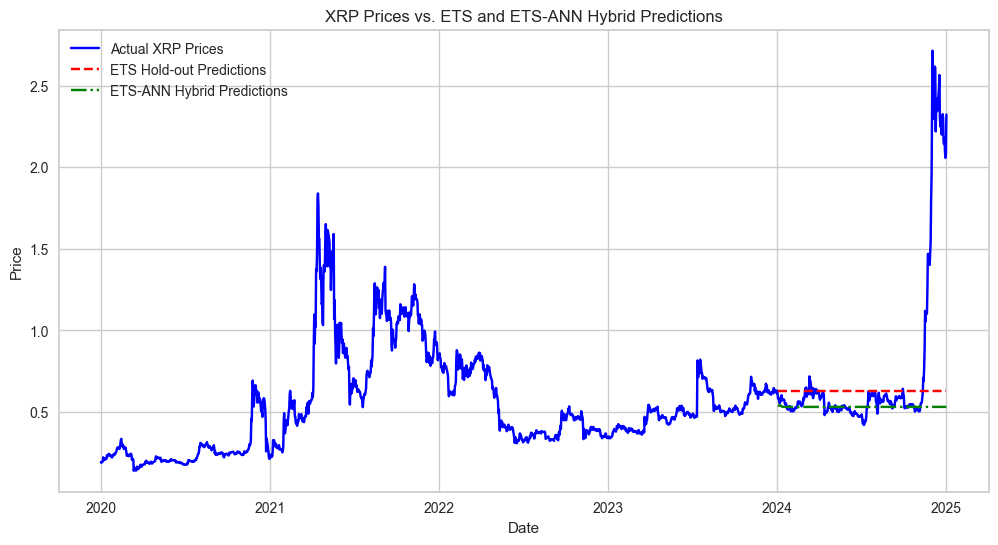

In [111]:
# Ensure correct index type for plotting
if isinstance(df_XRP.index, pd.PeriodIndex):
    df_XRP.index = df_XRP.index.to_timestamp()

if isinstance(ets_predictions_holdout.index, pd.PeriodIndex):
    ets_predictions_holdout.index = ets_predictions_holdout.index.to_timestamp()

# Ensure df_XRP is a DataFrame and contains the 'Close' column
if isinstance(df_XRP, pd.Series):
    df_XRP = df_XRP.to_frame(name='Close')

plt.figure(figsize=(12, 6))

# Plot Actual XRP Prices (Full Data)
if isinstance(df_XRP, pd.DataFrame) and 'Close' in df_XRP.columns:
    plt.plot(df_XRP.index, df_XRP['Close'], label='Actual XRP Prices', color='blue')
else:
    print("Error: 'Close' column not found in df_XRP DataFrame")

# Plot ETS Hold-out Predictions
if isinstance(ets_predictions_holdout, pd.DataFrame) and 'y_pred' in ets_predictions_holdout.columns:
    plt.plot(ets_predictions_holdout.index, ets_predictions_holdout['y_pred'], label='ETS Hold-out Predictions', color='red', linestyle='--')
else:
    print("Error: 'y_pred' column not found in ets_predictions_holdout DataFrame")

# Plot ETS-ANN Hybrid Predictions
if isinstance(final_predictions_holdout_hybrid, pd.Series):
    plt.plot(final_predictions_holdout_hybrid.index, final_predictions_holdout_hybrid, label='ETS-ANN Hybrid Predictions', color='green', linestyle='-.')
else:
    print("Error: final_predictions_holdout_hybrid is not a Series")

plt.title('XRP Prices vs. ETS and ETS-ANN Hybrid Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


First 10 Values of y_test after alignment:
Date
2024-01-03    0.582580
2024-01-04    0.588226
2024-01-05    0.576486
2024-01-06    0.568512
2024-01-07    0.551741
2024-01-08    0.577923
2024-01-09    0.566633
2024-01-10    0.599989
2024-01-11    0.602095
2024-01-12    0.570299
Freq: D, Name: Close, dtype: float64

First 10 Values of ets_predictions_holdout after alignment:
            y_pred
Date              
2024-01-03  0.6256
2024-01-04  0.6256
2024-01-05  0.6256
2024-01-06  0.6256
2024-01-07  0.6256
2024-01-08  0.6256
2024-01-09  0.6256
2024-01-10  0.6256
2024-01-11  0.6256
2024-01-12  0.6256

First 10 Actual Residuals (Test Data):
Date
2024-01-03   -0.043020
2024-01-04   -0.037374
2024-01-05   -0.049114
2024-01-06   -0.057088
2024-01-07   -0.073859
2024-01-08   -0.047677
2024-01-09   -0.058967
2024-01-10   -0.025611
2024-01-11   -0.023505
2024-01-12   -0.055301
Freq: D, dtype: float64

Indices of actual_residuals after alignment:
DatetimeIndex(['2024-01-03', '2024-01-04', '2024-0

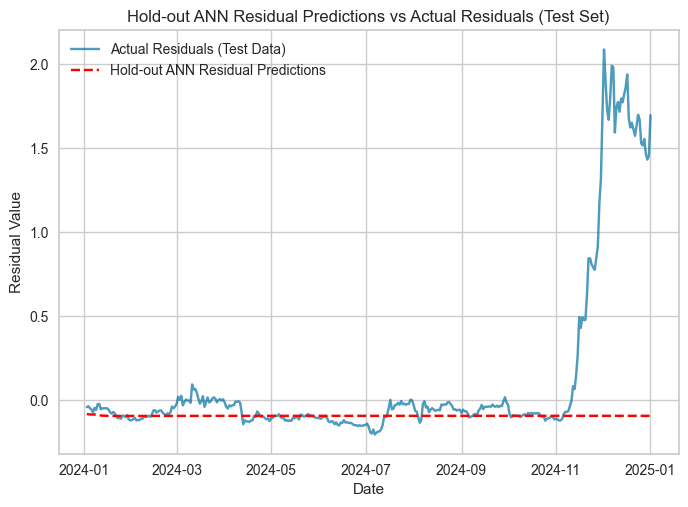

In [124]:
# Ensure indices of y_test and ets_predictions_holdout are DatetimeIndex for alignment
y_test = exp_XRP.get_config('y_test')

# Assuming ets_predictions_holdout is provided directly, if not, ensure it is computed or loaded properly
# For this example, let's assume ets_predictions_holdout is directly available as a DataFrame
# Replace this part with the correct method to obtain ets_predictions_holdout if necessary
ets_predictions_holdout = pd.DataFrame({
    'y_pred': [0.6256] * len(y_test)
}, index=y_test.index)

# Check if y_test index is PeriodIndex and convert if necessary
if isinstance(y_test.index, pd.PeriodIndex):
    y_test.index = y_test.index.to_timestamp()

# Check if ets_predictions_holdout index is PeriodIndex and convert if necessary
if isinstance(ets_predictions_holdout.index, pd.PeriodIndex):
    ets_predictions_holdout.index = ets_predictions_holdout.index.to_timestamp()

# Align the indices of y_test and ets_predictions_holdout
ets_predictions_holdout = ets_predictions_holdout.reindex(y_test.index)

# Calculate actual residuals: actual test values - ETS predictions
actual_residuals = y_test - ets_predictions_holdout['y_pred']

# Debug: Print the first few values of y_test and ets_predictions_holdout after alignment
print("\nFirst 10 Values of y_test after alignment:")
print(y_test.head(10))
print("\nFirst 10 Values of ets_predictions_holdout after alignment:")
print(ets_predictions_holdout.head(10))

# Debug: Print the first few values of actual residuals
print("\nFirst 10 Actual Residuals (Test Data):")
print(actual_residuals.head(10))

# Ensure indices are aligned and convert to DatetimeIndex if necessary
if isinstance(actual_residuals.index, pd.PeriodIndex):
    actual_residuals.index = actual_residuals.index.to_timestamp()

if isinstance(ann_predictions_holdout_denormalized.index, pd.PeriodIndex):
    ann_predictions_holdout_denormalized.index = ann_predictions_holdout_denormalized.index.to_timestamp()

# Debug: Print the indices of actual_residuals and ann_predictions_holdout_denormalized after alignment
print("\nIndices of actual_residuals after alignment:")
print(actual_residuals.index)
print("\nIndices of ann_predictions_holdout_denormalized after alignment:")
print(ann_predictions_holdout_denormalized.index)

# Plot actual residuals if they are not NaN
if not actual_residuals.isna().all():
    plt.plot(actual_residuals.index, actual_residuals, label='Actual Residuals (Test Data)', alpha=0.7)
else:
    print("All actual residuals are NaN, cannot plot actual residuals.")

# Plot ANN holdout predictions
plt.plot(ann_predictions_holdout_denormalized.index, ann_predictions_holdout_denormalized, label='Hold-out ANN Residual Predictions', linestyle='--', color='red')

plt.title('Hold-out ANN Residual Predictions vs Actual Residuals (Test Set)')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

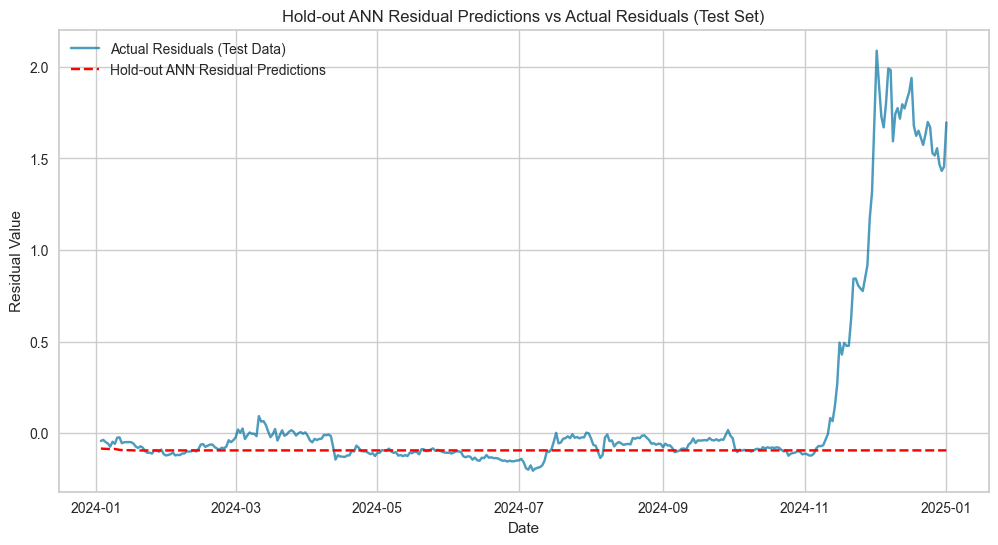

In [125]:
# 6. Plotting Hold-out ANN Residual Predictions vs Actual Residuals (Test Set) - Optional
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual residuals
plt.plot(actual_residuals.index, actual_residuals, label='Actual Residuals (Test Data)', alpha=0.7)

# Plot ANN holdout predictions
plt.plot(ann_predictions_holdout_denormalized.index, ann_predictions_holdout_denormalized, label='Hold-out ANN Residual Predictions', linestyle='--', color='red')

plt.title('Hold-out ANN Residual Predictions vs Actual Residuals (Test Set)')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()


First 10 Values of ann_predictions_holdout_denormalized:
Date
2024-01-03   -0.084287
2024-01-04   -0.085847
2024-01-05   -0.086538
2024-01-06   -0.086844
2024-01-07   -0.086980
2024-01-08   -0.087040
2024-01-09   -0.087067
2024-01-10   -0.089698
2024-01-11   -0.091753
2024-01-12   -0.092994
Freq: D, dtype: float32


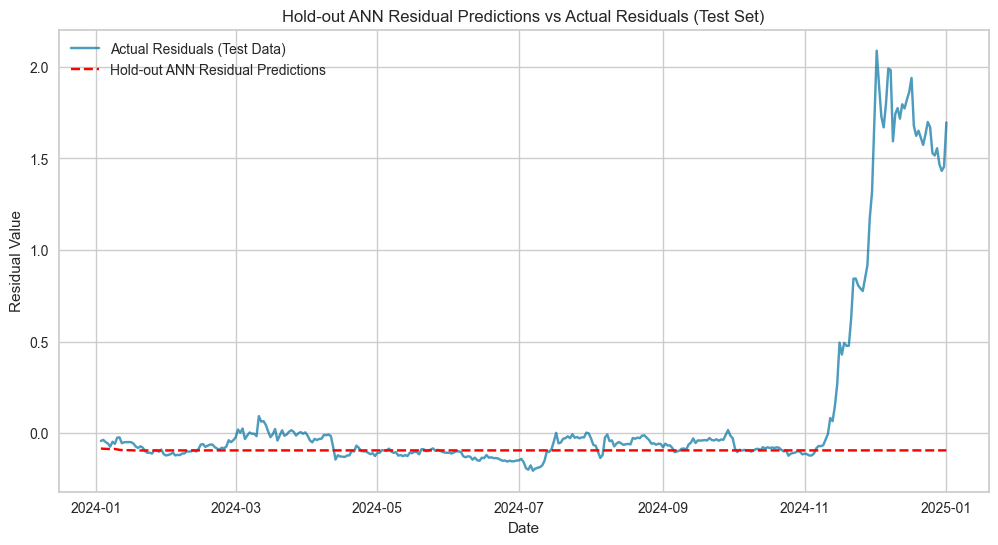

In [126]:
# Debug: Print the first few values of ann_predictions_holdout_denormalized
print("\nFirst 10 Values of ann_predictions_holdout_denormalized:")
print(ann_predictions_holdout_denormalized.head(10))

# Plot actual residuals
plt.figure(figsize=(12, 6))
plt.plot(actual_residuals.index, actual_residuals, label='Actual Residuals (Test Data)', alpha=0.7)

# Plot ANN holdout predictions
plt.plot(ann_predictions_holdout_denormalized.index, ann_predictions_holdout_denormalized, label='Hold-out ANN Residual Predictions', linestyle='--', color='red')

plt.title('Hold-out ANN Residual Predictions vs Actual Residuals (Test Set)')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()